Column names in the DataFrame:
Index(['embed_0', 'embed_1', 'embed_2', 'embed_3', 'embed_4', 'embed_5',
       'embed_6', 'embed_7', 'embed_8', 'embed_9',
       ...
       'embed_375', 'embed_376', 'embed_377', 'embed_378', 'embed_379',
       'embed_380', 'embed_381', 'embed_382', 'embed_383', 'output'],
      dtype='object', length=385)

First few rows of the DataFrame:
    embed_0   embed_1   embed_2   embed_3   embed_4   embed_5   embed_6  \
0 -0.089926  0.343874  0.176382  0.169358 -0.413337 -0.276315  0.188070   
1  0.303261  0.084930  0.047369 -0.017244 -0.524733 -0.104934  0.335107   
2 -0.274291  0.216801  0.029110  0.259279 -0.655594 -0.289643  0.073369   
3  0.118676  0.095572  0.157358  0.225097 -0.632885 -0.125629  0.204013   
4  0.298772  0.300674  0.366119 -0.022142 -0.748852 -0.035268  0.277504   

    embed_7   embed_8   embed_9  ...  embed_375  embed_376  embed_377  \
0  0.094621  0.330203 -0.258730  ...  -0.272278  -0.230662   0.173143   
1 -0.081476  0.213762 -0.10

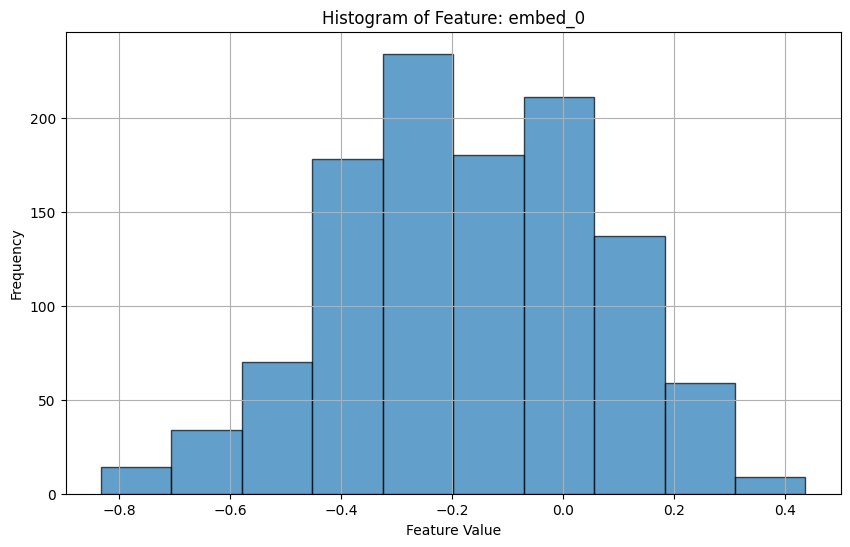

Mean of embed_0: -0.17029445322602035
Variance of embed_0: 0.05343827792925807


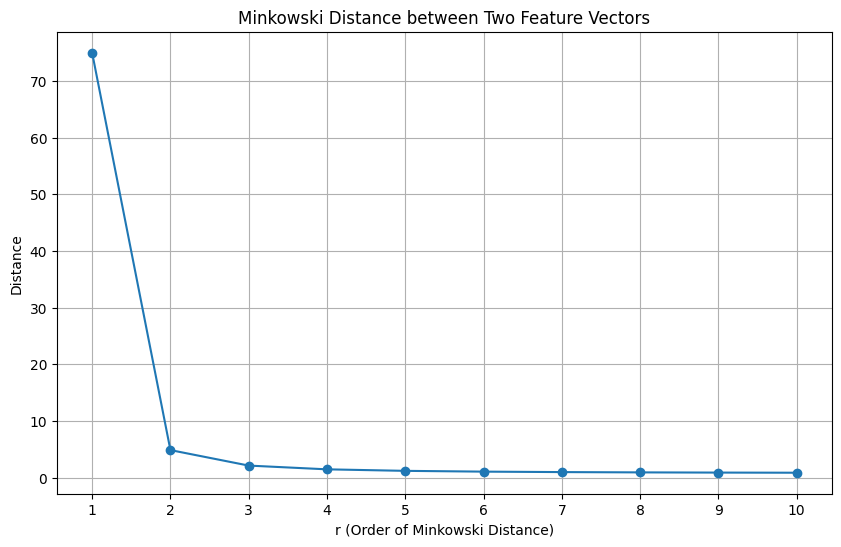

Minkowski Distance with r=1: 74.95742171496386
Minkowski Distance with r=2: 4.853526524381676
Minkowski Distance with r=3: 2.1203722613951492
Minkowski Distance with r=4: 1.4584931354061539
Minkowski Distance with r=5: 1.190435477588291
Minkowski Distance with r=6: 1.0528731355695171
Minkowski Distance with r=7: 0.9721489546673521
Minkowski Distance with r=8: 0.9205544826749266
Minkowski Distance with r=9: 0.8855801677671697
Minkowski Distance with r=10: 0.8608338902669797
Training set size: 788 samples
Test set size: 338 samples
X_train shape: (788, 384)
X_test shape: (338, 384)
y_train shape: (788,)
y_test shape: (338,)
Accuracy of kNN classifier on test set: 80.18%
Predicted classes for the test set:
[0 1 0 0 1 0 0 0 0 1 1 0 1 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 1 0 0 0 0 0
 0 0 0 0 0 1 0 1 0 1 1 0 0 0 0 1 0 1 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 1 0 0 0 0 1 0 0 0 1 1 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 1 0 0
 0 1 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 1 0

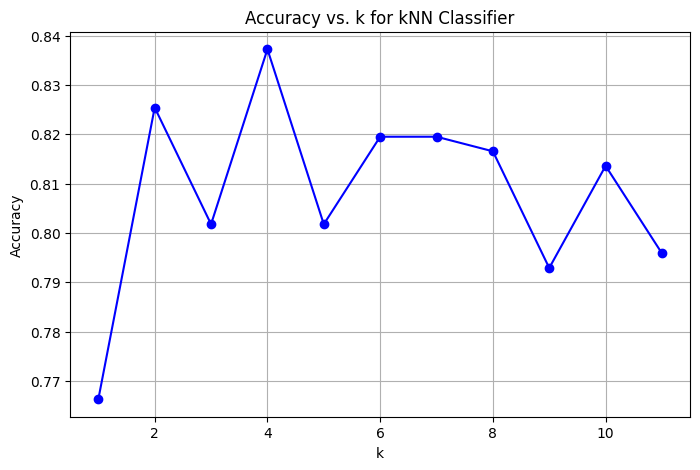

Accuracy for NN (k=1): 0.7663
Accuracy for k=3: 0.8018
Confusion Matrix for Training Set:
[[561  33]
 [ 62 132]]

Confusion Matrix for Test Set:
[[234  34]
 [ 33  37]]

Training Set Metrics:
Precision: 0.8000
Recall: 0.6804
F1-Score: 0.7354

Test Set Metrics:
Precision: 0.5211
Recall: 0.5286
F1-Score: 0.5248

Training Accuracy: 0.8794
Test Accuracy: 0.8018
Model has a good fit (similar training and test accuracy).


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score, accuracy_score
from scipy.spatial.distance import minkowski

# Load the dataset
file_path1 = 'training_mathbert.xlsx'
df = pd.read_excel(file_path1)

# Inspect column names
print("Column names in the DataFrame:")
print(df.columns)

# Check the first few rows of the DataFrame
print("\nFirst few rows of the DataFrame:")
print(df.head())

# A1: Evaluate Intraclass Spread and Interclass Distances
def calculate_intraclass_interclass(df_numeric, class1, class2):
    X = df_numeric.iloc[:, :-1].values
    y = df_numeric.iloc[:, -1].apply(lambda x: 1 if x > 4 else 0).values

    # Separate the features for each class
    X_class1 = X[y == class1]
    X_class2 = X[y == class2]

    if X_class1.size == 0 or X_class2.size == 0:
        print("One of the classes has no samples in the data.")
    else:
        # Calculate the mean vectors for both classes
        mean_class1 = np.mean(X_class1, axis=0)
        mean_class2 = np.mean(X_class2, axis=0)

        # Calculate the standard deviation for both classes (intraclass spread)
        std_class1 = np.std(X_class1, axis=0)
        std_class2 = np.std(X_class2, axis=0)

        # Calculate the distance between the mean vectors of both classes (interclass distance)
        interclass_distance = np.linalg.norm(mean_class1 - mean_class2)

        # Calculate the average intraclass spread for each class
        intraclass_spread_class1 = np.mean(std_class1)
        intraclass_spread_class2 = np.mean(std_class2)

        # Print the results
        print(f"Mean vector for class {class1}: {mean_class1}")
        print(f"Standard deviation (intraclass spread) for class {class1}: {std_class1}")
        print(f"Mean vector for class {class2}: {mean_class2}")
        print(f"Standard deviation (intraclass spread) for class {class2}: {std_class2}")

        print(f"\nAverage intraclass spread for class {class1}: {intraclass_spread_class1}")
        print(f"Average intraclass spread for class {class2}: {intraclass_spread_class2}")

        print(f"\nInterclass distance between class {class1} and class {class2}: {interclass_distance}")

# A2: Plot Feature Histogram
def plot_feature_histogram(df, feature_column):
    feature_data = df[feature_column].dropna().values

    # Calculate histogram data with 10 bins
    hist_data, bin_edges = np.histogram(feature_data, bins=10)

    # Plot the histogram
    plt.figure(figsize=(10, 6))
    plt.hist(feature_data, bins=10, edgecolor='black', alpha=0.7)
    plt.title(f'Histogram of Feature: {feature_column}')
    plt.xlabel('Feature Value')
    plt.ylabel('Frequency')
    plt.grid(True)
    plt.show()

    # Calculate the mean and variance of the feature
    mean_value = np.mean(feature_data)
    variance_value = np.var(feature_data)

    print(f"Mean of {feature_column}: {mean_value}")
    print(f"Variance of {feature_column}: {variance_value}")

# A3: Calculate Minkowski Distance
def calculate_minkowski_distance(df):
    feature_data = df.select_dtypes(include=[np.number])
    vector1 = feature_data.iloc[0].values
    vector2 = feature_data.iloc[1].values

    # Replace NaN values with 0
    vector1 = np.nan_to_num(vector1)
    vector2 = np.nan_to_num(vector2)

    # Define a range for r (from 1 to 10)
    r_values = np.arange(1, 11)

    # Calculate Minkowski distances for each r value
    distances = []
    for r in r_values:
        try:
            distance = minkowski(vector1, vector2, p=r)
            distances.append(distance)
        except ValueError as e:
            print(f"Error with r={r}: {e}")
            distances.append(np.nan)

    # Plot the Minkowski distances
    plt.figure(figsize=(10, 6))
    plt.plot(r_values, distances, marker='o')
    plt.title('Minkowski Distance between Two Feature Vectors')
    plt.xlabel('r (Order of Minkowski Distance)')
    plt.ylabel('Distance')
    plt.grid(True)
    plt.xticks(r_values)
    plt.show()

    # Print the Minkowski distances for each r
    for r, dist in zip(r_values, distances):
        print(f"Minkowski Distance with r={r}: {dist}")

# A4: Split Dataset into Train and Test
def split_dataset(df):
    # Assuming the target column is the last one and features are all other columns
    df_numeric = df.select_dtypes(include=[np.number])
    X = df_numeric.iloc[:, :-1].values
    y = df_numeric.iloc[:, -1].apply(lambda x: 1 if x > 4 else 0).values

    # Split dataset into training and test sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

    print(f"Training set size: {X_train.shape[0]} samples")
    print(f"Test set size: {X_test.shape[0]} samples")
    print("X_train shape:", X_train.shape)
    print("X_test shape:", X_test.shape)
    print("y_train shape:", y_train.shape)
    print("y_test shape:", y_test.shape)

    return X_train, X_test, y_train, y_test

# A5: Train kNN Classifier
def train_knn(X_train, y_train, k=3):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    return knn

# A6: Test Accuracy of kNN
def evaluate_model(knn, X_test, y_test):
    accuracy = knn.score(X_test, y_test)
    print(f"Accuracy of kNN classifier on test set: {accuracy * 100:.2f}%")

# A7: Predict Classes
def predict_classes(knn, X_test):
    y_pred = knn.predict(X_test)
    print("Predicted classes for the test set:")
    print(y_pred)
    test_vect = X_test[0].reshape(1, -1)
    pred_class = knn.predict(test_vect)
    print(f"Predicted class for the first test vector: {pred_class}")

# A8: Tune kNN with Different k Values
def tune_knn(X_train, y_train, X_test, y_test):
    k_values = range(1, 12)
    accuracy_scores = []

    for k in k_values:
        knn = KNeighborsClassifier(n_neighbors=k)
        knn.fit(X_train, y_train)
        y_pred = knn.predict(X_test)
        accuracy = accuracy_score(y_test, y_pred)
        accuracy_scores.append(accuracy)

    plt.figure(figsize=(8, 5))
    plt.plot(k_values, accuracy_scores, marker='o', linestyle='-', color='b')
    plt.title('Accuracy vs. k for kNN Classifier')
    plt.xlabel('k')
    plt.ylabel('Accuracy')
    plt.grid(True)
    plt.show()

    print(f"Accuracy for NN (k=1): {accuracy_scores[0]:.4f}")
    print(f"Accuracy for k=3: {accuracy_scores[2]:.4f}")

# A9: Evaluate Confusion Matrix and Metrics
def evaluate_confusion_matrix(knn, X_train, y_train, X_test, y_test):
    y_train_pred = knn.predict(X_train)
    y_test_pred = knn.predict(X_test)

    train_conf_matrix = confusion_matrix(y_train, y_train_pred)
    print("Confusion Matrix for Training Set:")
    print(train_conf_matrix)

    test_conf_matrix = confusion_matrix(y_test, y_test_pred)
    print("\nConfusion Matrix for Test Set:")
    print(test_conf_matrix)

    train_precision = precision_score(y_train, y_train_pred)
    train_recall = recall_score(y_train, y_train_pred)
    train_f1 = f1_score(y_train, y_train_pred)

    print("\nTraining Set Metrics:")
    print(f"Precision: {train_precision:.4f}")
    print(f"Recall: {train_recall:.4f}")
    print(f"F1-Score: {train_f1:.4f}")

    test_precision = precision_score(y_test, y_test_pred)
    test_recall = recall_score(y_test, y_test_pred)
    test_f1 = f1_score(y_test, y_test_pred)

    print("\nTest Set Metrics:")
    print(f"Precision: {test_precision:.4f}")
    print(f"Recall: {test_recall:.4f}")
    print(f"F1-Score: {test_f1:.4f}")

    train_accuracy = accuracy_score(y_train, y_train_pred)
    test_accuracy = accuracy_score(y_test, y_test_pred)

    print(f"\nTraining Accuracy: {train_accuracy:.4f}")
    print(f"Test Accuracy: {test_accuracy:.4f}")

    if train_accuracy - test_accuracy > 0.1:
        print("Model is likely overfitting (high training accuracy, low test accuracy).")
    elif test_accuracy > train_accuracy + 0.1:
        print("Model is likely underfitting (low training accuracy, higher test accuracy).")
    else:
        print("Model has a good fit (similar training and test accuracy).")

def main():
    df_numeric = df.select_dtypes(include=[np.number])

    # A1: Evaluate Intraclass Spread and Interclass Distances
    # Specify class1 and class2 based on your dataset
    calculate_intraclass_interclass(df_numeric, class1=0, class2=1)

    # A2: Plot Histogram for a Specific Feature
    # Replace 'feature_column_name' with the actual column name
    feature_column = df_numeric.columns[0]  # Choose the first numeric column or replace with actual column name
    plot_feature_histogram(df_numeric, feature_column=feature_column)

    # A3: Calculate Minkowski Distance
    calculate_minkowski_distance(df_numeric)

    # A4: Split Dataset into Train and Test
    X_train, X_test, y_train, y_test = split_dataset(df_numeric)

    # A5: Train kNN Classifier
    knn = train_knn(X_train, y_train, k=3)

    # A6: Evaluate Model Accuracy
    evaluate_model(knn, X_test, y_test)

    # A7: Predict Classes
    predict_classes(knn, X_test)

    # A8: Tune kNN with Different k Values
    tune_knn(X_train, y_train, X_test, y_test)

    # A9: Evaluate Confusion Matrix and Metrics
    evaluate_confusion_matrix(knn, X_train, y_train, X_test, y_test)

if __name__ == "__main__":
    main()
